In [1]:
import os
import tempfile
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [2]:
directory = "/content/drive/MyDrive/Colab Notebooks/ELEC4840/Project/2018/"

root_dir = tempfile.mkdtemp() if directory is None else directory
os.chdir(root_dir)
os.listdir('.')

['ISIC2018_Task3_Training_GroundTruth.csv',
 'ISIC2018_Task3_Validation_GroundTruth.csv',
 'ISIC2018_Task3_Validation_Input',
 'ISIC2018_Task3_Test_Input',
 'ISIC2018_Task3_Test_GroundTruth.csv',
 'ISIC2018_Task3_Training_Input',
 'train',
 'val',
 'test',
 'vgg16_model.pth',
 'vgg19_model.pth',
 '2018_VGG16.ipynb']

In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip

!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip

!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_GroundTruth.zip

--2024-05-05 08:53:02--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.88.20, 3.5.25.145, 52.217.107.76, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.88.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36681 (36K) [application/zip]
Saving to: ‘ISIC2018_Task3_Training_GroundTruth.zip’

ISIC2018_Task3_Trai 100%[===================>]  35.82K  --.-KB/s    in 0.06s   

2024-05-05 08:53:02 (587 KB/s) - ‘ISIC2018_Task3_Training_GroundTruth.zip’ saved [36681/36681]

--2024-05-05 08:53:02--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.88.20, 3.5.25.145, 52.217.107.76, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-chall

In [ ]:
!unzip "./ISIC2018_Task3_Training_Input.zip"
!unzip "./ISIC2018_Task3_Training_GroundTruth.zip"

!unzip "./ISIC2018_Task3_Validation_Input.zip"
!unzip "./ISIC2018_Task3_Validation_GroundTruth.zip"

!unzip "./ISIC2018_Task3_Test_Input.zip"
!unzip "./ISIC2018_Task3_Test_GroundTruth.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031050.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031051.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031052.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031053.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031054.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031055.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031056.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031057.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031058.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031059.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031060.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031061.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031062.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0031063.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0031064.jpg  
  inflating: ISIC20

In [ ]:
if not os.path.exists("./train"):
    os.makedirs("./train")
    os.makedirs("./train/benign")
    os.makedirs("./train/malignant")

if not os.path.exists("./val"):
    os.makedirs("./val")
    os.makedirs("./val/benign")
    os.makedirs("./val/malignant")

if not os.path.exists("./test"):
    os.makedirs("./test")
    os.makedirs("./test/benign")
    os.makedirs("./test/malignant")

In [ ]:
print(os.path.exists('./train'))
print(os.path.exists('./val'))
print(os.path.exists('./test'))

True
True
True


In [ ]:
import os
import shutil
import pandas as pd
import numpy as np

df = pd.read_csv("./ISIC2018_Task3_Training_GroundTruth.csv")

for i in range(len(df)):
    name, label_mel, label_nv, label_bcc, label_akiec, label_bkl, label_df, label_vasc = df["image"][i], df["MEL"][i], df["NV"][i], df["BCC"][i], df["AKIEC"][i], df["BKL"][i], df["DF"][i], df["VASC"][i]
    label = "benign" if label_mel == 0 and label_bcc == 0 and label_akiec == 0 else "malignant"
    shutil.copy("./ISIC2018_Task3_Training_Input/"+name+".jpg", "./train/"+label+"/"+name+".jpg")

df = pd.read_csv("./ISIC2018_Task3_Validation_GroundTruth.csv")

for i in range(len(df)):
    name, label_mel, label_nv, label_bcc, label_akiec, label_bkl, label_df, label_vasc = df["image"][i], df["MEL"][i], df["NV"][i], df["BCC"][i], df["AKIEC"][i], df["BKL"][i], df["DF"][i], df["VASC"][i]
    label = "benign" if label_mel == 0 and label_bcc == 0 and label_akiec == 0 else "malignant"
    shutil.copy("./ISIC2018_Task3_Validation_Input/"+name+".jpg", "./val/"+label+"/"+name+".jpg")

df = pd.read_csv("./ISIC2018_Task3_Test_GroundTruth.csv")

for i in range(len(df)):
    name, label_mel, label_nv, label_bcc, label_akiec, label_bkl, label_df, label_vasc = df["image"][i], df["MEL"][i], df["NV"][i], df["BCC"][i], df["AKIEC"][i], df["BKL"][i], df["DF"][i], df["VASC"][i]
    label = "benign" if label_mel == 0 and label_bcc == 0 and label_akiec == 0 else "malignant"
    shutil.copy("./ISIC2018_Task3_Test_Input/"+name+".jpg", "./test/"+label+"/"+name+".jpg")

In [ ]:
def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

train_files = count_files('./train')
val_files = count_files('./val')
test_files = count_files('./test')

print("Number of files in 'train':", train_files)
print("Number of files in 'val':", val_files)
print("Number of files in 'test':", test_files)

Number of files in 'train': 10015
Number of files in 'val': 193
Number of files in 'test': 1512


In [3]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch

def label_statistics(train_dataset):
    cls_count = np.zeros(2).astype(np.int64)

    for i, label in train_dataset:
        cls_count[label] += 1
    return cls_count

def label_weights_for_balance(train_dataset):
    cls_count = label_statistics(train_dataset)
    labels_weight_list = []
    for i, label in train_dataset:
        weight = 1 / cls_count[label]
        labels_weight_list.append(weight)
    return labels_weight_list

root_train, root_val, root_test = './train', './val', './test'

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0.1, hue=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


def get_train_test_set():
    train_dataset = ImageFolder(root_train, transform=train_transform)

    loader_train = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=256,
        shuffle=True
        )

    val_dataset = ImageFolder(root_val, transform=test_transform)
    loader_val = torch.utils.data.DataLoader(
        dataset=val_dataset,
        batch_size=64,
        shuffle=False
        )

    test_dataset = ImageFolder(root_test, transform=test_transform)
    loader_test = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=256,
        shuffle=False
        )

    return loader_train, loader_val, loader_test

# batch_size = 64
loader_train, loader_val, loader_test = get_train_test_set()

In [4]:
import torch.nn as nn

class VGG19(nn.Module):
    def __init__(self, num_classes=2):
        super(VGG19, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [6]:
from torchsummary import summary

model = VGG19(num_classes=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [7]:
from tqdm import tqdm
import numpy as np
import torch.nn as nn
from sklearn.metrics import roc_auc_score, accuracy_score
from torchvision.ops import focal_loss

max_epoch = 20
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

criterion = nn.BCELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_list, val_loss_list = [], []
auc_train_list, acc_train_list = [], []
auc_val_list, acc_val_list = [], []

for epoch in range(max_epoch):
    print(" -- Epoch {}/{}".format(epoch + 1, max_epoch))

    model.train()
    running_loss = 0.0
    train_lbl = []
    train_pred = []
    for data in tqdm(loader_train):
        optimizer.zero_grad()
        images, labels = data
        labels = labels.float()
        if use_cuda:
            images = images.cuda()
            labels = labels.float().cuda()
        outputs = model(images)[:,0]
        outputs = torch.sigmoid(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        y_scores = list(outputs.detach().cpu().numpy())
        y_true = list(labels.detach().cpu().numpy())
        train_lbl += y_true
        train_pred += y_scores

    loss = running_loss / len(loader_train)
    loss_list.append(loss)
    train_lbl, train_pred = np.array(train_lbl), np.array(train_pred)
    train_pred_lbl = np.around(train_pred)
    train_auc = roc_auc_score(train_lbl, train_pred)
    train_acc = accuracy_score(train_lbl, train_pred_lbl)
    auc_train_list.append(train_auc)
    acc_train_list.append(train_acc)


    model.eval()
    test_lbl, test_pred = [], []
    val_loss = 0.0
    for data in loader_val:
        test_images, test_labels = data
        test_labels = test_labels.float()
        if use_cuda:
            test_images = test_images.cuda()
            test_labels = test_labels.float().cuda()
        with torch.no_grad():
            test_outputs = model(test_images)[:, 0]
        test_outputs = torch.sigmoid(test_outputs)
        y_scores = list(test_outputs.detach().cpu().numpy())
        y_true = list(test_labels.detach().cpu().numpy())
        test_lbl += y_true
        test_pred += y_scores

        v_loss = criterion(test_outputs, test_labels)
        val_loss += v_loss.item()

    test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
    test_pred_lbl = np.around(test_pred)
    test_auc = roc_auc_score(test_lbl, test_pred)
    test_acc = accuracy_score(test_lbl, test_pred_lbl)
    auc_val_list.append(test_auc)
    acc_val_list.append(test_acc)
    val_loss = val_loss / len(loader_val)
    val_loss_list.append(val_loss)
    print(loss, val_loss, train_auc, test_auc)

torch.save(model.state_dict(), 'vgg19_model.pth')

model.eval()
test_lbl, test_pred = [], []
for data in loader_val:
    test_images, test_labels = data
    test_labels = test_labels.float()
    if use_cuda:
        test_images = test_images.cuda()
        test_labels = test_labels.float().cuda()
    test_outputs = model(test_images)[:, 0]
    test_outputs = torch.sigmoid(test_outputs)
    y_scores = list(test_outputs.detach().cpu().numpy())
    y_true = list(test_labels.detach().cpu().numpy())
    test_lbl += y_true
    test_pred += y_scores

test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
test_pred_lbl = np.around(test_pred)
test_auc = roc_auc_score(test_lbl, test_pred)
test_acc = accuracy_score(test_lbl, test_pred_lbl)
print(test_auc, test_acc)

 -- Epoch 1/20


100%|██████████| 40/40 [1:56:57<00:00, 175.44s/it]


0.48885142132639886 0.7236686199903488 0.6299940182312528 0.8149786455155583
 -- Epoch 2/20


100%|██████████| 40/40 [03:34<00:00,  5.35s/it]


0.44501108303666115 0.6331668756902218 0.7366170780450041 0.8238255033557047
 -- Epoch 3/20


100%|██████████| 40/40 [03:34<00:00,  5.37s/it]


0.42992755994200704 0.6319920271635056 0.755948406197016 0.8244356314826115
 -- Epoch 4/20


100%|██████████| 40/40 [03:33<00:00,  5.35s/it]


0.428487791121006 0.6652911752462387 0.7640317299120307 0.836790726052471
 -- Epoch 5/20


100%|██████████| 40/40 [03:30<00:00,  5.25s/it]


0.4237280301749706 0.6282129287719727 0.7688300645652641 0.8393837705918243
 -- Epoch 6/20


100%|██████████| 40/40 [03:33<00:00,  5.35s/it]


0.4176252603530884 0.7240377441048622 0.7726748842024292 0.8407565588773642
 -- Epoch 7/20


100%|██████████| 40/40 [03:31<00:00,  5.29s/it]


0.4178385306149721 0.6832684390246868 0.7687182635170388 0.835875533862111
 -- Epoch 8/20


100%|██████████| 40/40 [03:30<00:00,  5.27s/it]


0.42001400887966156 0.6291860044002533 0.7718005695314273 0.8428920073215376
 -- Epoch 9/20


100%|██████████| 40/40 [03:29<00:00,  5.25s/it]


0.4221039444208145 0.6300828494131565 0.7715070362284916 0.8326723611958512
 -- Epoch 10/20


100%|██████████| 40/40 [03:29<00:00,  5.23s/it]


0.4278674520552158 0.6142032779753208 0.7670552784760317 0.839993898718731
 -- Epoch 11/20


100%|██████████| 40/40 [03:28<00:00,  5.22s/it]


0.4235554441809654 0.6578164957463741 0.7677926511475892 0.8280964002440512
 -- Epoch 12/20


100%|██████████| 40/40 [03:29<00:00,  5.23s/it]


0.4205893360078335 0.6226988099515438 0.7750001047539633 0.839536302623551
 -- Epoch 13/20


100%|██████████| 40/40 [03:28<00:00,  5.22s/it]


0.4164010867476463 0.6172261647880077 0.7753427137015771 0.839536302623551
 -- Epoch 14/20


100%|██████████| 40/40 [03:30<00:00,  5.26s/it]


0.4202481508255005 0.6105712503194809 0.7718036486630793 0.839536302623551
 -- Epoch 15/20


100%|██████████| 40/40 [03:31<00:00,  5.29s/it]


0.41825383752584455 0.6286703422665596 0.7763297182423123 0.8223001830384382
 -- Epoch 16/20


100%|██████████| 40/40 [03:31<00:00,  5.28s/it]


0.41554330065846445 0.5451943948864937 0.7740723338179951 0.8352654057352044
 -- Epoch 17/20


100%|██████████| 40/40 [03:30<00:00,  5.27s/it]


0.41671479418873786 0.6379422843456268 0.7747827561516925 0.8302318486882245
 -- Epoch 18/20


100%|██████████| 40/40 [03:31<00:00,  5.29s/it]


0.4204610899090767 0.5874021090567112 0.7746080392381683 0.8364856619890177
 -- Epoch 19/20


100%|██████████| 40/40 [03:31<00:00,  5.28s/it]


0.4163357250392437 0.5749928578734398 0.7792439417608596 0.839993898718731
 -- Epoch 20/20


100%|██████████| 40/40 [03:30<00:00,  5.26s/it]


0.4207908369600773 0.6165119148790836 0.768488788849912 0.8351128737034776
0.8351128737034776 0.7564766839378239


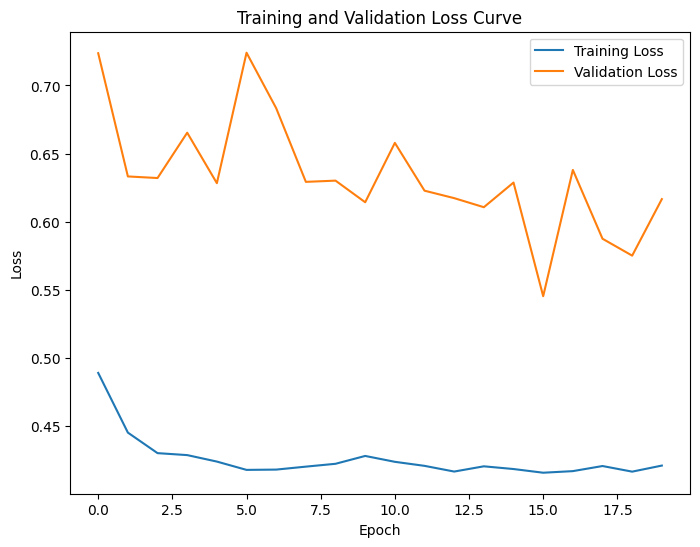

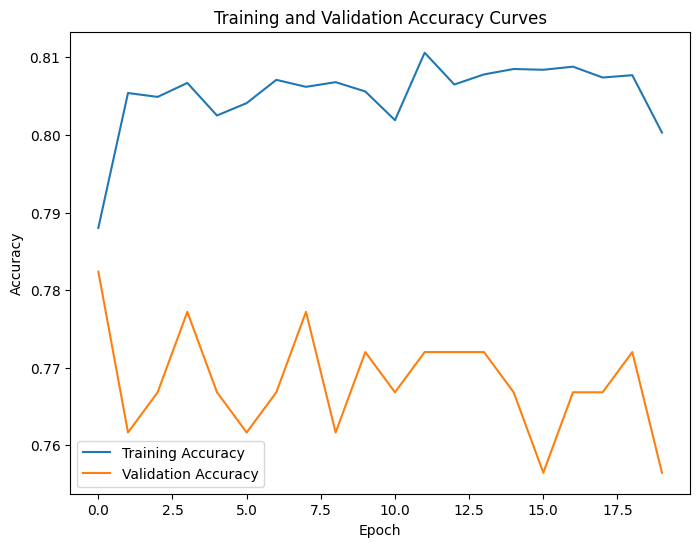

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(acc_train_list, label='Training Accuracy')
plt.plot(acc_val_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()